In [44]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram

In [45]:
qr_inp = QuantumRegister(2,'inputs')
qr_work = QuantumRegister(2,'aux')
cr = ClassicalRegister(2)
qc_addition = QuantumCircuit(qr_inp, qr_work,cr)
qc_addition.h(0)
qc_addition.h(1)
qc_addition.cx(qr_inp[0], qr_work[0])
qc_addition.cx(qr_inp[1], qr_work[0])
qc_addition.ccx(qr_inp[0], qr_inp[1], qr_work[1])
qc_addition.measure(qr_work, cr)
qc_addition.draw()

┌───┐                     
inputs_0: ┤ H ├──■─────────■────────
          ├───┤  │         │        
inputs_1: ┤ H ├──┼────■────■────────
          └───┘┌─┴─┐┌─┴─┐  │  ┌─┐   
   aux_0: ─────┤ X ├┤ X ├──┼──┤M├───
               └───┘└───┘┌─┴─┐└╥┘┌─┐
   aux_1: ───────────────┤ X ├─╫─┤M├
                         └───┘ ║ └╥┘
   c20: 2/═════════════════════╩══╩═
                               0  1

{'01': 525, '10': 247, '00': 228}


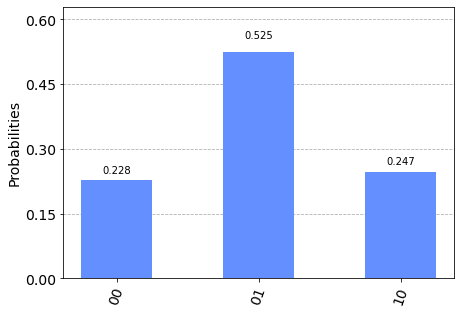

In [46]:
backend = Aer.get_backend('qasm_simulator')
cnts = execute(qc_addition, backend, shots=1000).result().get_counts(qc_addition)
print(cnts)
plot_histogram(cnts)

In [47]:
# additon by one
qr_inp = QuantumRegister(3,'inputs')
cr = ClassicalRegister(3)
qc_add_One = QuantumCircuit(qr_inp, cr)
#qc_add_One.x(1)
qc_add_One.x(2) # set initial value as 100
qc_add_One.ccx(0,1,2)
qc_add_One.cx(0,1)
qc_add_One.x(0)
qc_add_One.measure(qr_inp, cr)
qc_add_One.draw()

┌───┐┌─┐
inputs_0: ───────■────■──┤ X ├┤M├
                 │  ┌─┴─┐└┬─┬┘└╥┘
inputs_1: ───────■──┤ X ├─┤M├──╫─
          ┌───┐┌─┴─┐└┬─┬┘ └╥┘  ║ 
inputs_2: ┤ X ├┤ X ├─┤M├───╫───╫─
          └───┘└───┘ └╥┘   ║   ║ 
   c21: 3/════════════╩════╩═══╩═
                      2    1   0

{'101': 1000}


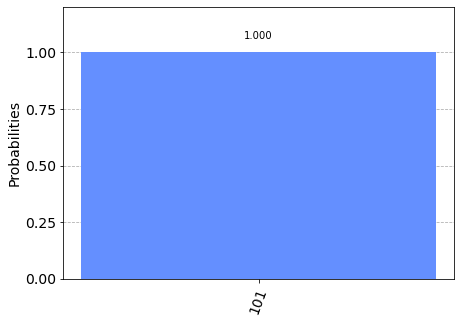

In [48]:
backend = Aer.get_backend('qasm_simulator')
cnts = execute(qc_add_One, backend, shots=1000).result().get_counts()
print(cnts)
plot_histogram(cnts)

In [50]:
# end of program